# BMIN 5200 Foundations of Artificial Intelligence in Health

Assignment 2: Search

In [ ]:
# mount the google drive - this is necessary to access supporting src
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
from collections import deque
sys.path.append("/content/drive/MyDrive/Colab Notebooks/bmin5200-2023/src")
from util import weighted_graph_from_list, draw_weighted_graph

__Problem 1: 4 points__

Examine the state space graph below. Node 'A' is the initial 'start' state of the search. Node 'G' is the final 'goal'
state which we are trying to identify. All state transitions are assumed to be of equal cost (i.e. 1). __Answer the following questions in the space provided below__:
1. Are there any infinite loops in this graph? If so specify the nodes involved in that loop.
2. Specify the 'deepest' state successor path that could be traversed in this graph from 'A' to any other node
without revisiting any nodes. (i.e. Give the ordered set of nodes involved)
3. Given the option to apply either standard depth first or breadth first search to this state space graph, what
would be the best strategy, and why? Note: assume that in this graph lower nodes are visited first for both
DFS and BFS.
4. If we dropped nodes J and K, and transformed this state space graph into a search tree, how many leaf
nodes (i.e. lowest level nodes) would exist in the resulting tree? Hint: ennumerate all full unique paths
through the graph.

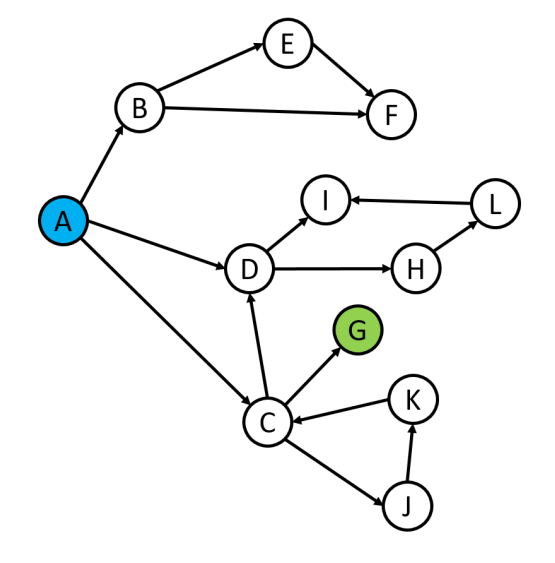


__Problem 1: Your response here__ (Double click to edit cell) <br/>
1. Your response
2. Your response
3. Your response
4. Your response

__Problem 2: 2 points__

In the code cell below, a state space graph is created from the nested list specified by the `graph` variable. The list is organized by the scheme `['N', [('E', W)]]` where `N` indicates a graph node, and `('E', W)` indicates there is an edge between `N` and `E` (another graph node) with weight `W`. The state space graph can be visualized with the `draw_weighted_graph` function (execute the cell to see this). The code cell also includes a partially implemented breadth first search algorithm in the function `breadth_first_search`.

__For this problem, complete implementation of the breadth first search function. The function should stop it's search if the goal node is found and return the full search path up to and including the goal node. Otherwise it should return the path used to search the entire state space__.

In [ ]:
graph = [['A', [('B',2), ('C',1), ('D',5)]],
        ['B', [('E',10), ('F',2)]],
        ['C', [('G',3), ('H',1)]],
        ['D', [('I',2), ('J',1)]],
        ['G', [('K',1), ('L',7)]]]

G = weighted_graph_from_list(graph)
draw_weighted_graph(G, goal='I')

def breadth_first_search(G, start_node, goal_node, verbose=False):
    if start_node == goal_node:
        return [start_node]

    explored = []
    frontier = deque([start_node]) # doubly ended queue see https://docs.python.org/2/library/collections.html#collections.deque

    while frontier:
        node = frontier.popleft()
        if verbose:
            print("visiting node: ", node)
        if node not in explored:

            #######  START YOUR CODE HERE ##########
            # HINT: You will need to use G[node] to get the neighbors of node, see https://networkx.org/documentation/stable/reference/introduction.html#


            #######  END YOUR CODE HERE ##########

            if verbose:
                print("updated queue: ", frontier)

    return explored

# It may be helpful to set verbose=True to see intermediate results
breadth_first_search(G, 'A', 'I', verbose=False)


__Problem 3: 2 points__

As in the previous problem, in the code cell below, a state space graph is created from the nested list specified by the `graph` variable. The code cell also includes a partially implemented depth first search algorithm in the function `depth_first_search`.

__For this problem, complete implementation of the depth first search function. The function should stop it's search if the goal node is found and return the full search path up to and including the goal node. Otherwise it should return the path used to search the entire state space__.

In [ ]:
graph = [['A', [('B',2), ('C',1), ('D',5)]],
        ['B', [('E',10), ('F',2)]],
        ['C', [('G',3), ('H',1)]],
        ['D', [('I',2), ('J',1)]],
        ['G', [('K',1), ('L',7)]]]

G = weighted_graph_from_list(graph)

def depth_first_search(G, start_node, goal_node, verbose=False):
    if start_node == goal_node:
        return [start_node]

    explored = []
    frontier = [start_node]

    while frontier:
        node = frontier.pop()
        if verbose:
            print("visiting node: ", node)
        if node not in explored:
            explored.append(node)
            if node == goal_node:
                return explored

            extension = list(set(G[node]) - set(explored))

            #######  START YOUR CODE HERE ##########
            # HINT: you will need to perform two operations on the `extension` list in order to maintain the "left to right" convention
            # used in the class slides. Although this is an arbitrary choice, it is useful to understand how the algorithm works using
            # stack operations. It may be helpful to use verbose=True to see intermediate versions of the stack.
            # Finally, you will need to appropriately combine the `extension` and the `stack`


            #######  END YOUR CODE HERE ##########

            if verbose:
                print("updated stack: ", frontier)

    return explored

draw_weighted_graph(G, goal='I')
# It may be helpful to set verbose=True to see intermediate results
depth_first_search(G, 'A', 'H', verbose=False)

__Problem 4 : 4 points__

As in the previous two problems, in the code cell below, a state space graph is created from the nested list specified by the `graph` variable. The code cell also includes a partially implemented A* search algorithm in the function `astar_search`. Unlike the depth first search and breadth first search, the A* algorithm must store partial path information in the Frontier with the ability to compute the path cost to the frontier node and the estimated total path cost to the goal node. The `Path` class implemented in the cell below is provided to support these operations. You should review the `Path` class carefully. Of note, the `Path` class `__init__` method takes as input a heursitc function. This function is used to estimate the cost from the Frontier node to the goal node.

__For this problem, you must (a) implement the heurstic function used to estimate the cost from a given state space node to the goal node using the information in the table below; and (b) complete implementation of the `astar_search` function. The function should stop it's search if the goal node, 'I', is found and return the full search path and path cost up to and including the goal node.__

| Sate ID | h(n) |
|---------|------|
| A       | 10   |
| B       | 12   |
| C       | 5    |
| D       | 3    |
| E       | 8    |
| F       | 14   |
| G       | 4    |
| H       | 14   |
| I       | 0    |
| J       | 5    |
| K       | 7    |
| L       | 6    |

In [ ]:
graph = [['A', [('B',2), ('C',1), ('D',5)]],
        ['B', [('E',10), ('F',2)]],
        ['C', [('G',3), ('H',1)]],
        ['D', [('I',2), ('J',1)]],
        ['G', [('K',1), ('L',7)]]]

G = weighted_graph_from_list(graph)
draw_weighted_graph(G, goal='I')

class Path:
        """Path from a start node to self.node with associated path cost"""
        def __init__(self, node, path_to_node = None):
            self.node = node
            self.path_to_node = path_to_node

        def path_cost(self):
            """True cost of path to self.node"""
            if self.path_to_node is None:
                return 0
            else:
                return self.path_to_node.path_cost() \
                + G.get_edge_data(self.path_to_node.node, self.node)['weight']

        def estimated_cost_to_goal(self, heuristic):
            """Estimated cost to goal if following this path"""
            return self.path_cost() + heuristic(self.node)

        def as_list(self):
            if self.path_to_node is None:
                return [self.node]
            else:
                path = self.path_to_node.as_list().copy()
                path.append(self.node)
                return path

def h(node):
    #######  START YOUR CODE HERE ##########


    #######  END YOUR CODE HERE ##########

def astar_search(G, start_node, goal, heuristic, verbose=False):
    # Your code here
    if start_node == goal:
        return Path(start_node)

    frontier = [Path(start_node)]

    while frontier:
        path = frontier.pop()
        if path.node == goal:
            return path

        if verbose:
            print('\nCurrent path', path.as_list(), 'Path cost', path.path_cost(), 'Estimated cost to goal', path.estimated_cost_to_goal(heuristic))

        for neighbor in list(set(G[path.node]) - set(path.as_list())):
            #######  START YOUR CODE HERE ##########
            # HINT: You will need to add to the frontier.
            # Also, you may need to sort the frontier, recalling that Python list.pop() removes the last element of a list.


            #######  END YOUR CODE HERE ##########

        if verbose:
            print('Frontier')
            for path in frontier:
                print('Node', path.node, '\tPath to Node', path.as_list(), '\tEstimated Cost to Goal', path.estimated_cost_to_goal(heuristic))

    return None

# It may be helpful to set verbose=True to see intermediate results
rslt = astar_search(G, 'A', 'I', h, verbose=False)
print("\nPath to Goal:", rslt.as_list(), "\tPath Cost", rslt.path_cost())

__Problem 5: 3 points__
In the space provide below, explain the potential advantages of using heuristic search over uninformed search.

__Problem 5: Your response here__ (Double click to edit cell)